<a href="https://colab.research.google.com/github/pablex72/CNN-deep-learning/blob/main/SOS_EOS_Determination_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

In [7]:
ndvi_data = pd.read_csv('/content/drive/MyDrive/research-the/interpolated_data_filled_splines.csv')

In [8]:
import numpy as np
from scipy.signal import find_peaks

# Assuming your NDVI data is stored in a DataFrame called 'ndvi_data'
# Convert the 'Date' column to datetime format if it's not already

# Extract the NDVI values as a NumPy array
ndvi_values = ndvi_data['NDVI'].values

# Find local maxima
maxima_indices, _ = find_peaks(ndvi_values, prominence=0.02)  # Adjust prominence as needed

# Find local minima
minima_indices, _ = find_peaks(-ndvi_values, prominence=0.02)  # Adjust prominence as needed

# Create a DataFrame to store critical points
critical_points = pd.DataFrame({'Date': ndvi_data['Date'][maxima_indices].values.tolist() +
                                               ndvi_data['Date'][minima_indices].values.tolist(),
                                'NDVI': ndvi_values[maxima_indices].tolist() +
                                        ndvi_values[minima_indices].tolist(),
                                'Type': ['Maxima'] * len(maxima_indices) + ['Minima'] * len(minima_indices)})

# Sort the critical points by date
critical_points = critical_points.sort_values(by='Date')

# Display the critical points
print(critical_points)


          Date      NDVI    Type
3    1/15/2021  0.798868  Maxima
11  10/12/2020  0.079070  Minima
13   10/7/2021  0.194923  Minima
9    10/8/2019  0.121145  Minima
7   11/11/2022  0.169681  Maxima
5   12/31/2021  0.788899  Maxima
1    2/15/2020  0.678428  Maxima
8    3/22/2019  0.281381  Minima
14   3/31/2022  0.137197  Minima
0    5/26/2019  0.454710  Maxima
6    6/29/2022  0.488376  Maxima
10    6/4/2020  0.242694  Minima
12    6/9/2021  0.161590  Minima
4    8/13/2021  0.393630  Maxima
2     8/3/2020  0.491584  Maxima
15   9/17/2022  0.028411  Minima


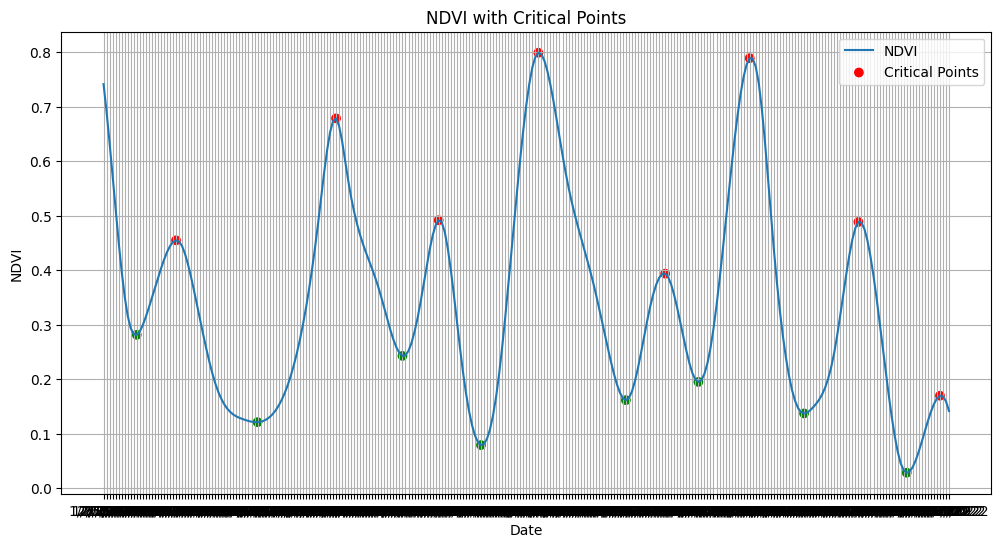

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming your NDVI data is stored in a DataFrame called 'ndvi_data'
# Convert the 'Date' column to datetime format if it's not already

# Extract the NDVI values as a NumPy array
ndvi_values = ndvi_data['NDVI'].values

# Find local maxima
maxima_indices, _ = find_peaks(ndvi_values, prominence=0.02)  # Adjust prominence as needed

# Find local minima
minima_indices, _ = find_peaks(-ndvi_values, prominence=0.02)  # Adjust prominence as needed

# Create a DataFrame to store critical points
critical_points = pd.DataFrame({'Date': ndvi_data['Date'][maxima_indices].values.tolist() +
                                               ndvi_data['Date'][minima_indices].values.tolist(),
                                'NDVI': ndvi_values[maxima_indices].tolist() +
                                        ndvi_values[minima_indices].tolist(),
                                'Type': ['Maxima'] * len(maxima_indices) + ['Minima'] * len(minima_indices)})

# Sort the critical points by date
critical_points = critical_points.sort_values(by='Date')

# Plot the critical points
plt.figure(figsize=(12, 6))
plt.plot(ndvi_data['Date'], ndvi_values, label='NDVI')
plt.scatter(critical_points['Date'], critical_points['NDVI'], c=critical_points['Type'].map({'Maxima': 'r', 'Minima': 'g'}), label='Critical Points')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI with Critical Points')
plt.legend()
plt.grid()
plt.show()


In [10]:
import numpy as np

# Assuming 'critical_points' DataFrame contains the minima and their corresponding NDVI values

# Initialize variables to store the areas
minima_areas = []

# Iterate through each pair of adjacent minima
for i in range(1, len(critical_points)):
    if critical_points.iloc[i]['Type'] == 'Minima':
        # Get the indices of the data points between the minima
        start_idx = critical_points.index[i-1]
        end_idx = critical_points.index[i]

        # Extract the NDVI values between the minima
        ndvi_values_between_minima = ndvi_values[start_idx:end_idx+1]

        # Calculate the area under the curve using the trapezoidal rule
        area = np.trapz(ndvi_values_between_minima)

        # Add the area to the list of minima areas
        minima_areas.append(area)

# Create a DataFrame to store the minima areas
minima_areas_df = pd.DataFrame({'Date': critical_points[critical_points['Type'] == 'Minima']['Date'].values.tolist(),
                                'Minima Area': minima_areas})

# Display the minima areas
print(minima_areas_df)


         Date  Minima Area
0  10/12/2020     3.031660
1   10/7/2021     0.577943
2   10/8/2019     0.000000
3   3/22/2019     3.421514
4   3/31/2022     1.759815
5    6/4/2020     1.301420
6    6/9/2021     0.566526
7   9/17/2022     4.842198


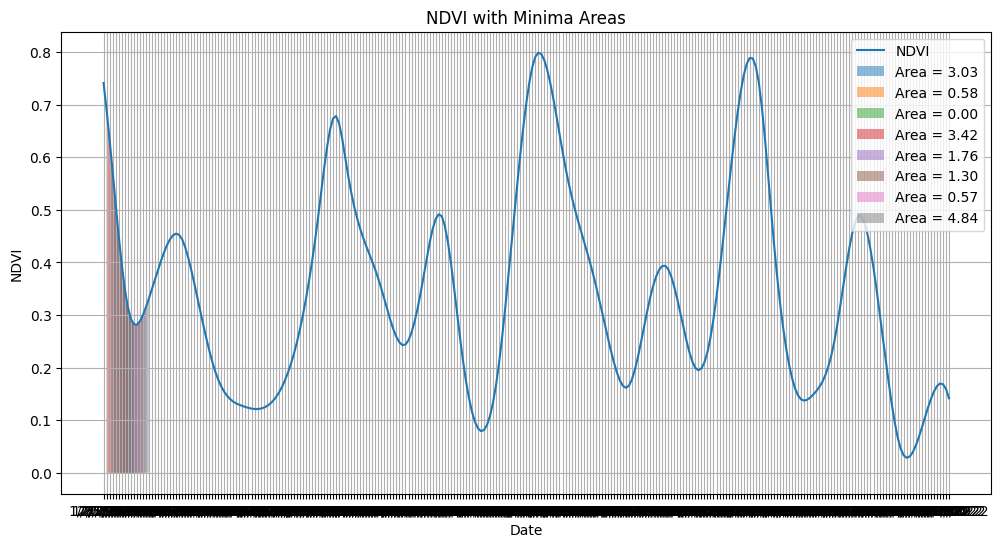

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'critical_points' DataFrame contains the minima and their corresponding NDVI values
# Assuming 'minima_areas_df' DataFrame contains the calculated areas

# Create a plot of your NDVI data
plt.figure(figsize=(12, 6))
plt.plot(ndvi_data['Date'], ndvi_values, label='NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI with Minima Areas')

# Iterate through each pair of adjacent minima
for i in range(1, len(critical_points)):
    if critical_points.iloc[i]['Type'] == 'Minima':
        # Get the indices of the data points between the minima
        start_idx = critical_points.index[i-1]
        end_idx = critical_points.index[i]

        # Extract the NDVI values between the minima
        ndvi_values_between_minima = ndvi_values[start_idx:end_idx+1]

        # Calculate the area under the curve using the trapezoidal rule
        area = np.trapz(ndvi_values_between_minima)

        # Highlight the area between minima
        plt.fill_between(ndvi_data['Date'][start_idx:end_idx+1], ndvi_values_between_minima, alpha=0.5, label=f'Area = {area:.2f}')

# Display the legend
plt.legend()
plt.grid()
plt.show()


In [12]:
# Sort the minima areas in ascending order
minima_areas_df = minima_areas_df.sort_values(by='Minima Area')

# Calculate the cumulative sum of minima areas
minima_areas_df['Cumulative Sum'] = minima_areas_df['Minima Area'].cumsum()

# Calculate the total area under all minima curves
total_area = minima_areas_df['Minima Area'].sum()

# Find the SOS (Start of Season) and EOS (End of Season)
sos_threshold = 0.05 * total_area
eos_threshold = 0.95 * total_area

# Find the indices corresponding to SOS and EOS
sos_index = minima_areas_df[minima_areas_df['Cumulative Sum'] >= sos_threshold].index[0]
eos_index = minima_areas_df[minima_areas_df['Cumulative Sum'] >= eos_threshold].index[0]

# Get the dates corresponding to SOS and EOS
sos_date = minima_areas_df.iloc[sos_index]['Date']
eos_date = minima_areas_df.iloc[eos_index]['Date']

# Display SOS and EOS
print(f'Start of Season (SOS): {sos_date}')
print(f'End of Season (EOS): {eos_date}')


Start of Season (SOS): 6/9/2021
End of Season (EOS): 9/17/2022
